In [1]:
pip install opencv-python "numpy<2" matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, title=None, cmap=None):
    plt.figure(figsize=(6,4))
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap or "gray")
    else:
        plt.imshow(img) 
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()

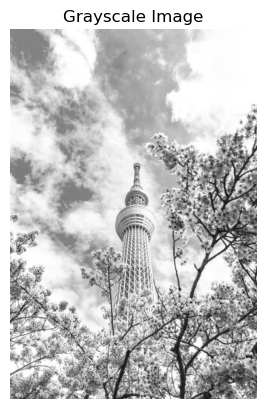

In [6]:
image_data = cv2.imread('/Users/230108/Downloads/sakura.jpg', 0)

plt.imshow(image_data, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [8]:
image_data.shape

(612, 408)

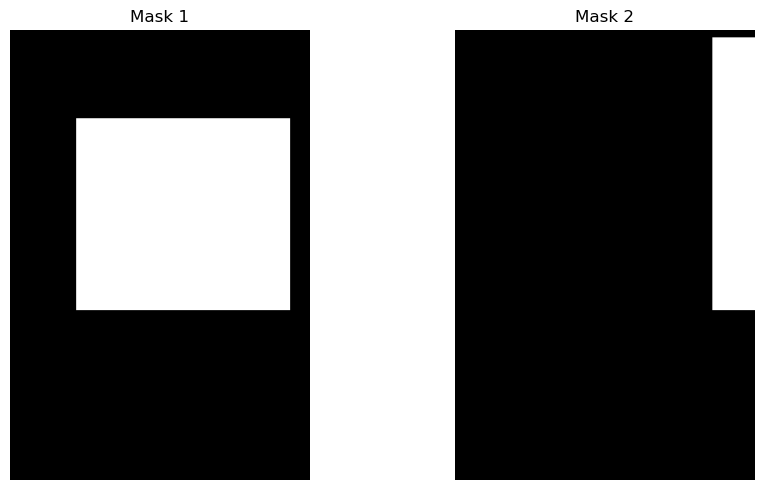

In [9]:
mask1 = np.zeros(image_data.shape[:2], np.uint8)
mask2 = np.zeros(image_data.shape[:2], np.uint8)

cv2.rectangle(mask1, (90, 120), (380, 380), 255, -1)
cv2.rectangle(mask2, (350, 10), (635, 380), 255, -1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mask1, cmap='gray')
plt.title("Mask 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask2, cmap='gray')
plt.title("Mask 2")
plt.axis("off")

plt.tight_layout()
plt.show()

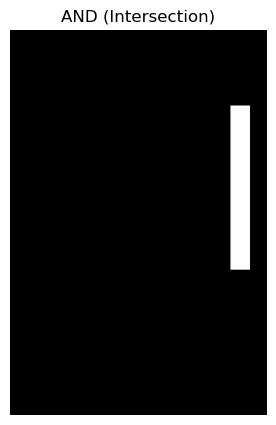

In [12]:
And = cv2.bitwise_and(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(And, cmap='gray')
plt.title("AND (Intersection)")
plt.axis("off")
plt.show()

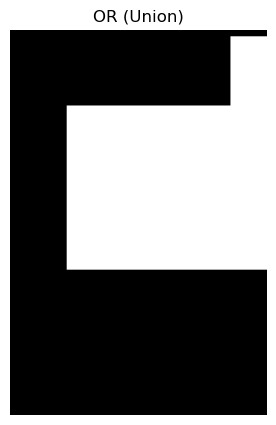

In [13]:
bitwiseOr = cv2.bitwise_or(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseOr, cmap='gray')
plt.title("OR (Union)")
plt.axis("off")
plt.show()

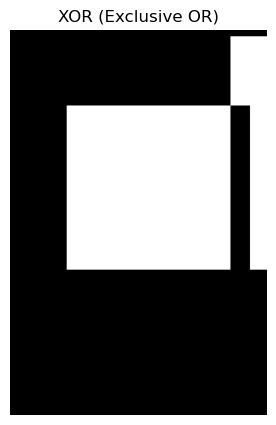

In [14]:
bitwiseXor = cv2.bitwise_xor(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseXor, cmap='gray')
plt.title("XOR (Exclusive OR)")
plt.axis("off")
plt.show()

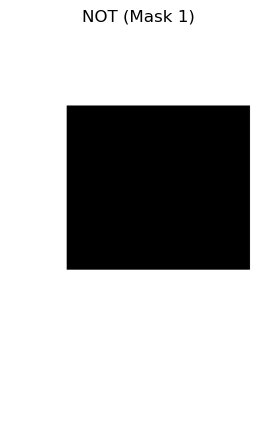

In [15]:
bitwiseNot_sq = cv2.bitwise_not(mask1)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseNot_sq, cmap='gray')
plt.title("NOT (Mask 1)")
plt.axis("off")
plt.show()

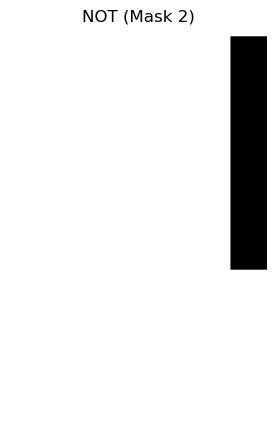

In [16]:
bitwiseNot_ell = cv2.bitwise_not(mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseNot_ell, cmap='gray')
plt.title("NOT (Mask 2)")
plt.axis("off")
plt.show()

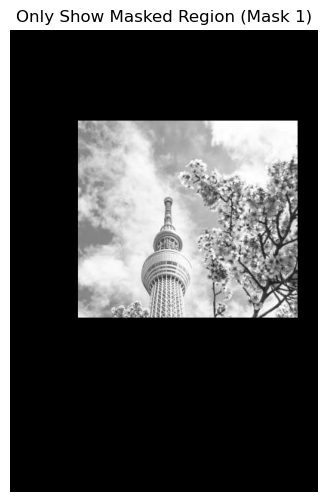

In [17]:
puppy = cv2.bitwise_and(image_data, image_data, mask=mask1)

puppy_rgb = cv2.cvtColor(puppy, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(puppy_rgb)
plt.title("Only Show Masked Region (Mask 1)")
plt.axis("off")
plt.show()

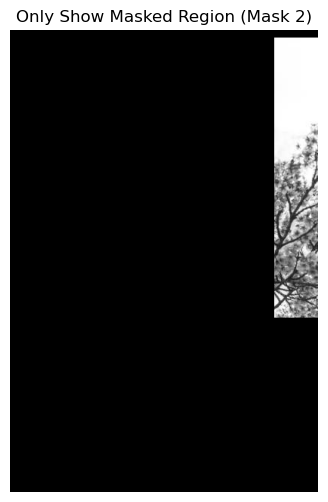

In [22]:
dog = cv2.bitwise_and(image_data, image_data, mask=mask2)

dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Only Show Masked Region (Mask 2)")
plt.axis("off")
plt.show()


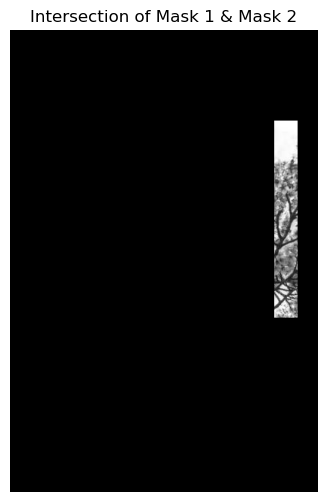

In [21]:
dog = cv2.bitwise_and(image_data, image_data, mask=And)

dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Intersection of Mask 1 & Mask 2")
plt.axis("off")
plt.show()

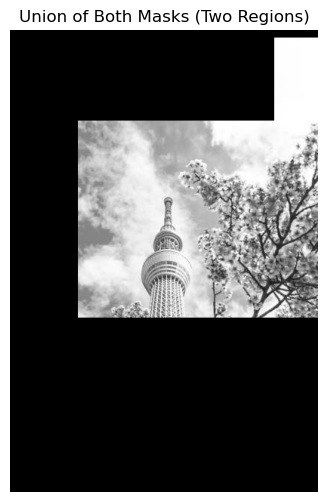

In [23]:
dog = cv2.bitwise_and(image_data, image_data, mask=bitwiseOr)

dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Union of Both Masks (Two Regions)")
plt.axis("off")
plt.show()

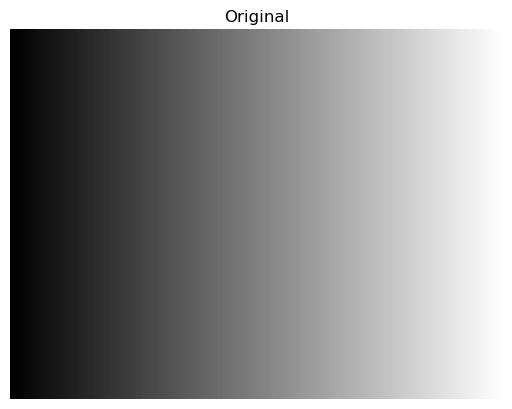

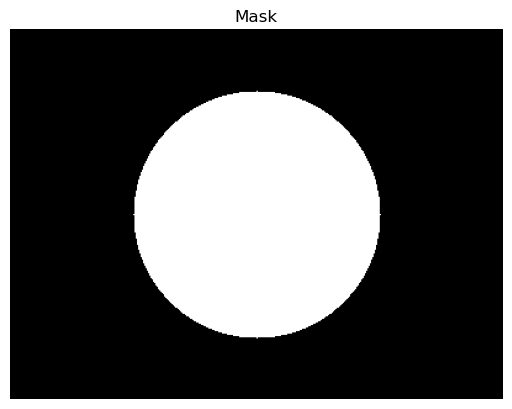

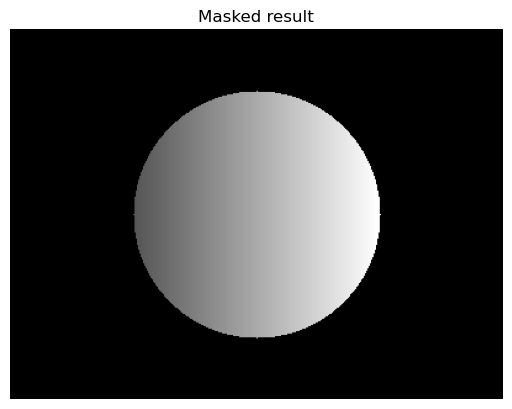

In [24]:
def show(img, title, cmap="gray"):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

img = np.tile(np.linspace(0, 255, 400, dtype=np.uint8), (300, 1))
h, w = img.shape

mask = np.zeros((h, w), dtype=np.uint8)
cx, cy = w // 2, h // 2 
r = min(h, w) // 3      
cv2.circle(mask, (cx, cy), r, 255, -1) 

masked = cv2.bitwise_and(img, img, mask=mask)

show(img, "Original", cmap="gray")
show(mask, "Mask", cmap="gray")
show(masked, "Masked result", cmap="gray")


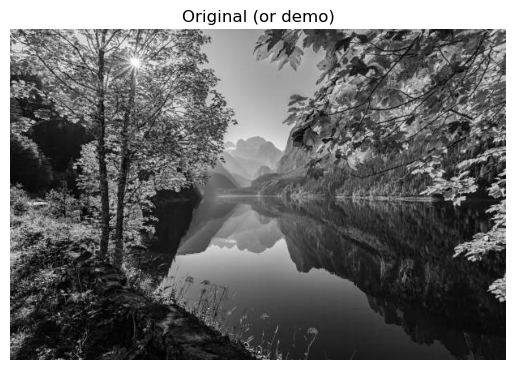

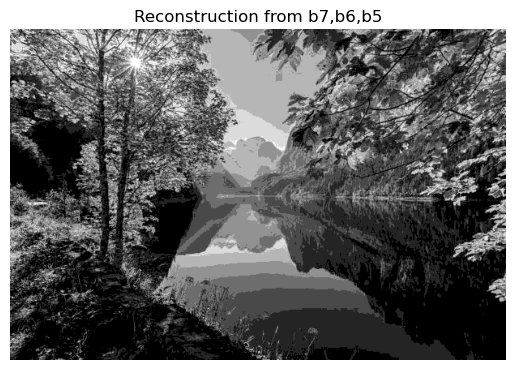

In [28]:
def show(img, title, cmap='gray'):
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

img = cv2.imread('/Users/230108/Downloads/tree.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    img = (np.random.rand(256, 256) * 255).astype(np.uint8)

planes = [(img >> i) & 1 for i in range(8)]

recon = np.zeros_like(img, dtype=np.uint8)
for i in [7, 6, 5]:
    recon = recon + (planes[i].astype(np.uint8) << i)

show(img, "Original (or demo)", cmap="gray")
show(recon, "Reconstruction from b7,b6,b5", cmap="gray")


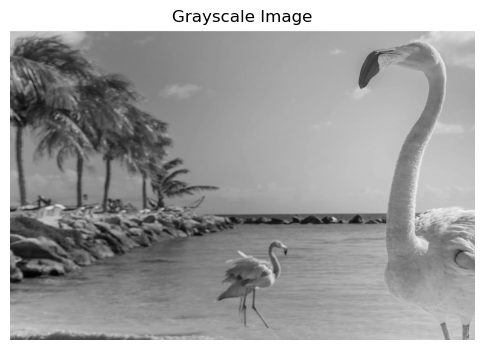

In [30]:
img = cv2.imread('/Users/230108/Downloads/tools-feature.webp', 0)

plt.figure(figsize=(6,6))
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

Text(0, 0.5, 'Frequency')

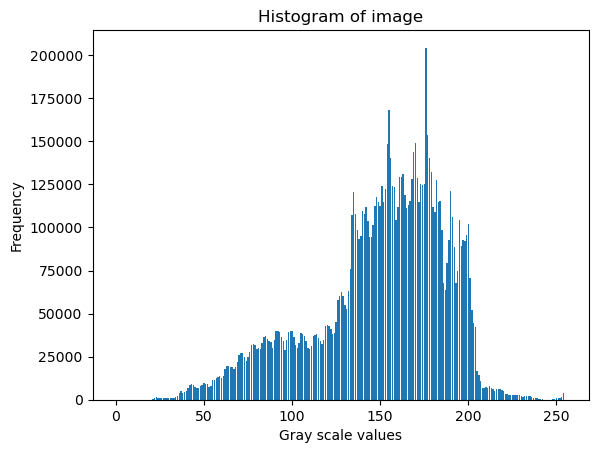

In [31]:
hist = cv2.calcHist(images=[img], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

plt.bar(range(256), hist.ravel())
plt.title('Histogram of image')
plt.xlabel('Gray scale values')
plt.ylabel('Frequency')

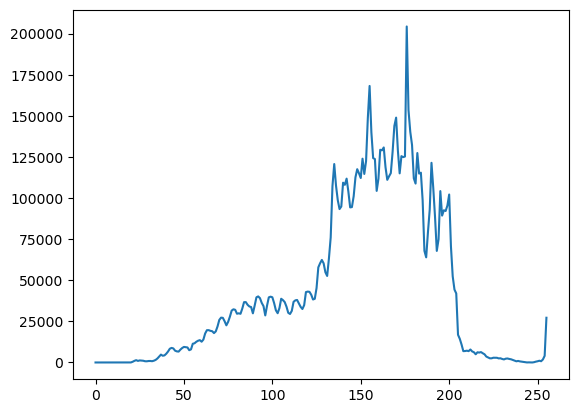

In [32]:
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

In [34]:
high = cv2.imread('/Users/230108/Downloads/tools-feature.webp')
low = cv2.imread('/Users/230108/Downloads/images.jpeg')

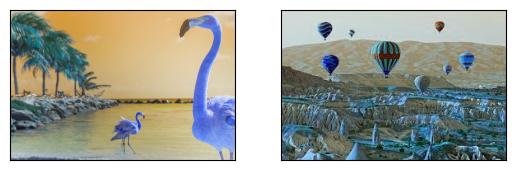

In [35]:
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

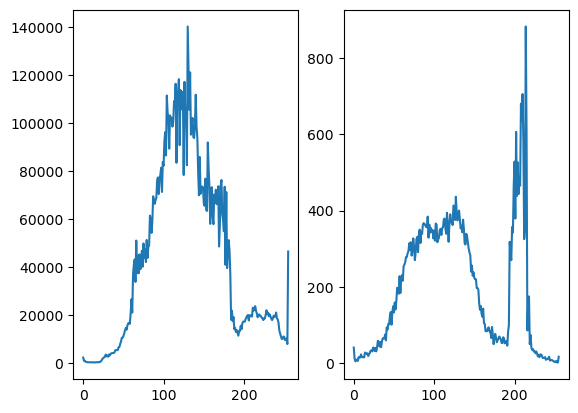

In [36]:
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()